In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# K-Nearest Neighbors (K-NN)

The K-NN algorithm is a supervised learning technique that classifies a new data point based on its \(K\) nearest neighbors in the training dataset. The main principle is that nearby points tend to belong to the same class.

1. **Distance Calculation:**  
   The classification is based on the distance between the new point and points in the dataset. The two distance metrics used are:
   - **Euclidean Distance:** Measures the "normal" distance between two points in Euclidean space.
   - **Manhattan Distance:** Measures the distance by summing the differences along orthogonal axes.

2. **Classification:**  
   The new point is assigned to the class of the majority of its \(K\) nearest neighbors.

# Proximity-Weighted Nearest Neighbors (PW-NN)

PW-NN is an enhanced variant of K-NN that considers distances by weighting the neighbors. The main idea is that closer neighbors have a greater influence on the final classification.

1. **Distance Calculation:**  
   Distances are calculated from all points in the training dataset, similar to K-NN.

2. **Weight Assignment:**  
   Each neighbor is given a weight that is inversely proportional to its distance from the test point.

3. **Classification:**  
   The label of the new point is determined by aggregating the votes of the weighted neighbors and selecting the class with the highest total weight.

# Advantages and Disadvantages

## Advantages of PW-NN:
- Better accuracy in datasets with non-uniform class distributions.
- Greater robustness against outliers and noise in the data.

## Disadvantages of PW-NN:
- Higher computational intensity compared to K-NN.
- Performance may depend on the choice of the weighting function and distance metric.

In [2]:
def evaluate_knn(k, distance_metric):
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"K={k}, Distance Metric={distance_metric}, Accuracy={accuracy:.4f}")
    return accuracy

In [3]:
def evaluate_weighted_knn(k, distance_metric):
    weighted_knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric, weights='distance')
    weighted_knn.fit(X_train, y_train)
    y_pred = weighted_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Weighted K={k}, Distance Metric={distance_metric}, Accuracy={accuracy:.4f}")
    return accuracy

# Dataset Overview

1. **Source:**  
   The dataset originates from the UCI Machine Learning Repository and is designed for classification tasks involving uppercase letters of the English alphabet.

2. **Content:**  
   The dataset comprises 20,000 examples of letters, each represented by 16 numerical features, including:
   - **x-box:** Horizontal position of the letter.
   - **y-box:** Vertical position of the letter.
   - **width:** Width of the letter.
   - **height:** Height of the letter.
   - **onpix:** Number of black pixels that compose the letter.
   - Other characteristics describing the shape and appearance of the letter.

3. **Objective:**  
   The goal is to classify each example into one of the 26 letters of the alphabet using machine learning algorithms based on their features.

In [4]:
data = pd.read_csv("../letter+recognition/letter-recognition.data")
data

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:

X = data.iloc[:, 1:].values  # Features
y = data.iloc[:, 0].values  # Labels (letters)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

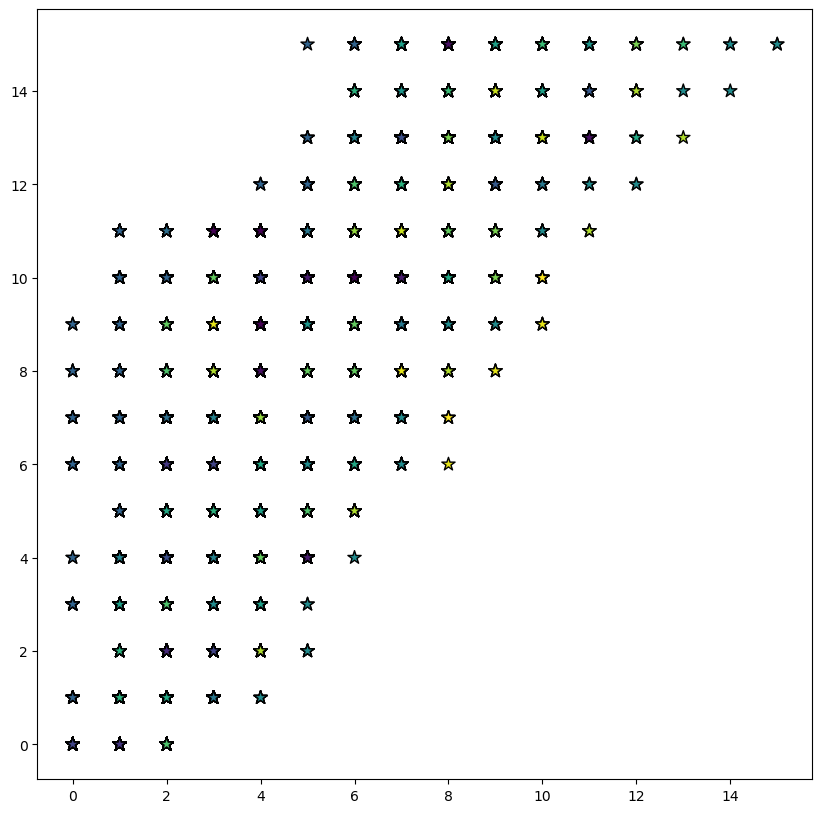

In [6]:
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
plt.show()

In [7]:
k_values = [1,3, 5, 7, 9]
distance_metrics = ['euclidean', 'manhattan']

In [8]:
print("K-NN:\n")
for k in k_values:
    for metric in distance_metrics:
        evaluate_knn(k, metric)

K-NN:

K=1, Distance Metric=euclidean, Accuracy=0.9580
K=1, Distance Metric=manhattan, Accuracy=0.9514
K=3, Distance Metric=euclidean, Accuracy=0.9548
K=3, Distance Metric=manhattan, Accuracy=0.9528
K=5, Distance Metric=euclidean, Accuracy=0.9520
K=5, Distance Metric=manhattan, Accuracy=0.9522
K=7, Distance Metric=euclidean, Accuracy=0.9508
K=7, Distance Metric=manhattan, Accuracy=0.9528
K=9, Distance Metric=euclidean, Accuracy=0.9466
K=9, Distance Metric=manhattan, Accuracy=0.9484


In [9]:
print("ProximityWeighed-NN:\n")        
for k in k_values:
    for metric in distance_metrics:
        evaluate_weighted_knn(k, metric)

ProximityWeighed-NN:

Weighted K=1, Distance Metric=euclidean, Accuracy=0.9580
Weighted K=1, Distance Metric=manhattan, Accuracy=0.9514
Weighted K=3, Distance Metric=euclidean, Accuracy=0.9598
Weighted K=3, Distance Metric=manhattan, Accuracy=0.9580
Weighted K=5, Distance Metric=euclidean, Accuracy=0.9570
Weighted K=5, Distance Metric=manhattan, Accuracy=0.9586
Weighted K=7, Distance Metric=euclidean, Accuracy=0.9554
Weighted K=7, Distance Metric=manhattan, Accuracy=0.9600
Weighted K=9, Distance Metric=euclidean, Accuracy=0.9544
Weighted K=9, Distance Metric=manhattan, Accuracy=0.9582


Here’s a detailed analysis of the results:

### 1. **K-NN (Unweighted)**

| K  | Euclidean Accuracy | Manhattan Accuracy |
|----|--------------------|--------------------|
| 1  | 0.9580             | 0.9514             |
| 3  | 0.9548             | 0.9528             |
| 5  | 0.9520             | 0.9522             |
| 7  | 0.9508             | 0.9528             |
| 9  | 0.9466             | 0.9484             |

- **Comparison of Euclidean vs. Manhattan**: 
  - For \( K=1 \), the accuracy with the **Euclidean distance** is slightly higher (0.9580 vs. 0.9514).
  - For larger values of \( K \), the performances between **Euclidean** and **Manhattan** are very similar, with **Manhattan** starting to outperform **Euclidean** from \( K=3 \) onward.
  
- **Effect of \( K \)**:
  - Increasing \( K \) generally leads to a slight decrease in overall accuracy. 
    - For example, with **Euclidean**, accuracy decreases from 0.9580 at \( K=1 \) to 0.9466 at \( K=9 \).
    - Similarly, with **Manhattan**, accuracy decreases from 0.9514 to 0.9484 for \( K=9 \).
  
- **Conclusion**:
  - The standard K-NN with **Euclidean distance** performs best at \( K=1 \), suggesting that having a single nearby observation yields higher accuracy.
  - However, for larger \( K \) values, **Manhattan distance** performs better and is more robust.

### 2. **Proximity-Weighted K-NN (Weighted)**

| Weighted K  | Euclidean Accuracy | Manhattan Accuracy |
|-------------|--------------------|--------------------|
| 1           | 0.9580             | 0.9514             |
| 3           | 0.9598             | 0.9580             |
| 5           | 0.9570             | 0.9586             |
| 7           | 0.9554             | 0.9600             |
| 9           | 0.9544             | 0.9582             |

- **Comparison of Euclidean vs. Manhattan**:
  - The weighted model achieves slightly better results with **Manhattan distance** starting from \( K=5 \) compared to **Euclidean distance**.
  - The difference is most pronounced at \( K=7 \), where **Manhattan** reaches the highest accuracy (0.9600) compared to **Euclidean** (0.9554).
  
- **Effect of Weighting**:
  - Compared to standard K-NN, the **Weighted K-NN** improves in almost all cases. The weighted model gives more importance to the nearest neighbors, making it more accurate.
  - For example, for \( K=3 \), accuracy with **Euclidean** increases from 0.9548 to 0.9598, and with **Manhattan** from 0.9528 to 0.9580.
  
- **Effect of \( K \)**:
  - Accuracy remains more stable with the weighted model compared to the standard K-NN. Increasing \( K \) does not show a significant drop in performance, suggesting that the weighted algorithm is less sensitive to the value of \( K \).
  - For \( K=9 \), with **Manhattan**, accuracy is still relatively high (0.9582), whereas in standard K-NN it drops to 0.9484.

### 3. **Overall Comparison Between K-NN and Proximity-Weighted K-NN**

- **Best Overall Accuracy**: 
  - The best overall result was achieved with **Proximity-Weighted K-NN**, using \( K=7 \) and **Manhattan distance** (0.9600).
  - The standard K-NN achieves a maximum accuracy of 0.9580 for \( K=1 \) with **Euclidean distance**, but for higher \( K \) values, the weighted model performs significantly better.
  
- **Performance Stability**: 
  - **Proximity-Weighted K-NN** proves to be more stable than standard K-NN. The accuracy does not drastically decrease as \( K \) increases, and in some cases, it improves.
  
- **Distance Metrics**:
  - For the **unweighted model**, **Euclidean distance** is slightly better for \( K=1 \), but **Manhattan distance** becomes more competitive and even superior for larger \( K \) values.
  - For the **weighted model**, **Manhattan distance** appears to have a greater advantage for \( K \geq 5 \), which may be due to the fact that Manhattan distance penalizes large differences in coordinate values less than Euclidean distance.

### 4. **Final Recommendations**

- **Unweighted K-NN**: If choosing to use unweighted K-NN, the optimal combination is \( K=1 \) with **Euclidean distance** (0.9580). However, if a higher \( K \) is to be used, **Manhattan distance** might be preferable.

- **Proximity-Weighted K-NN**: Overall, **Proximity-Weighted K-NN** offers better performance compared to standard K-NN, especially with **Manhattan**. The maximum accuracy was achieved with \( K=7 \) and **Manhattan distance** (0.9600). This suggests that a weighted approach with Manhattan distance may be ideal for the dataset.

- **Values of \( K \)**: 
  - For **standard K-NN**, \( K=1 \) is generally the best.
  - For **weighted K-NN**, \( K=3 \) or \( K=7 \) seem to offer a good balance of stability and accuracy.

### Additional Considerations

- **Robustness of Manhattan Distance**: **Manhattan distance** appears to be slightly more robust than **Euclidean distance** for both weighted and unweighted models, particularly for \( K > 1 \).
  
- **Dataset Size**: The accuracy of K-NN can be influenced by the dataset size and the number of features. If the dataset is very large or if there are many features, you may want to consider dimensionality reduction (e.g., using PCA) or employing a weighted sampling technique.

In conclusion, **Proximity-Weighted K-NN** with **Manhattan distance** generally exhibits superior performance and stability, while standard K-NN works well for \( K=1 \) with **Euclidean distance**.